# Reading THEMIS ASI raw image data

Below we'll retrieve THEMIS ASI data, read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [387]:
import requests

In [388]:

url = "https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/stream0/2020/03/29/inuv_themis17/ut07/20200329_0739_inuv_themis17_full.pgm.gz"
r = requests.get(url)

In [389]:
# save data to a local file
filename1 = "20200329_0739_inuv_themis17_full.pgm.gz"
with open(filename1, 'wb') as f:
    f.write(r.content)

## Read the data file

In [390]:
import themis_imager_readfile

In [391]:
img, meta, problematic_files = themis_imager_readfile.read(filename1)

In [392]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 256 x 256
Number of images: 20


In [393]:
# data for the first image
img[:,:,0]

array([[2160, 2145, 2183, ..., 2182, 2128, 2180],
       [2175, 2150, 2170, ..., 2149, 2137, 2142],
       [2168, 2145, 2146, ..., 2167, 2144, 2148],
       ...,
       [2151, 2161, 2151, ..., 2160, 2158, 2170],
       [2165, 2156, 2151, ..., 2133, 2139, 2165],
       [2180, 2158, 2133, ..., 2153, 2164, 2166]], dtype=uint16)

In [394]:
# metadata for first image
meta[0]

{'Revised': '2007-03-19',
 'Site unique ID': 'inuv',
 'Imager unique ID': 'themis17',
 'Project unique ID': 'THEMIS',
 'Imager model': 'starlight Xpress MX716 with THEMIS all-sky optics',
 'Imager comment': 'Inuvik',
 'Ccd type': 'Sony ICX249AL',
 'Ccd xsize': '752 pixels',
 'Ccd ysize': '290 pixels',
 'Ccd background': '2080',
 'Pixel depth': '16 bits',
 'Pixel aspect ratio': '0.5181',
 'Optical type': 'THEMIS all-sky',
 'Optical projection': 'a1=1.5,a3=0.0,b2=0.0,b4=0.0',
 'Optical center': 'x0=378,y0=152',
 'Computer name': 'inuv i686',
 'Operating system': 'Linux 2.6.32-431.el6.i686 #1 SMP Fri Nov 22 00:26:36 UTC 2013',
 'Site name': 'Inuvik',
 'Geodetic latitude': '68.41256',
 'Geodetic Longitude': '226.23039',
 'Geodetic altitude': '0.0',
 'NTP target': '127.127.1.0',
 'NTP delay': '0.000',
 'NTP offset': '0.000',
 'NTP jitter': '0.001',
 'Mode unique ID': 'full',
 'Mode sequence number': '43181',
 'CCD device': '/dev/ccdA',
 'Exposure options': 'WIDTH=512 HEIGHT=256 XBIN=2 YBIN=

## Visualize the image

In [395]:
%matplotlib inline
from matplotlib import pyplot as plt

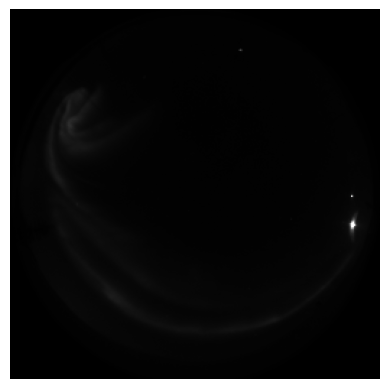

In [396]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

# Let's scale the image so it's a bit brighter

Next we'll scale the image using a linear scale with a min and max cut-off. This allows us to easily brighten the image while not increasing the CCD readout noise.

In [397]:
import numpy as np

scale_min = 3000.0   # MUST be a float
scale_max = 14000.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 65535.0 / scale_diff
im_scaled = (img[:,:,0] - scale_min) * scale_ratio    # apply scale
im_scaled = im_scaled.clip(0, 65535) + 0.5            # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint16)               # convert data type to 16-bit

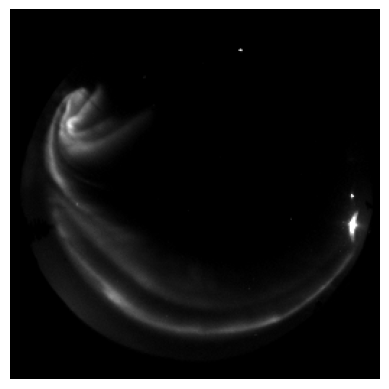

In [398]:
# scale the image with 3000 as the floor and 14000 as the ceiling, then display
plt.imshow(im_scaled, cmap="gray")
plt.axis("off")
plt.show() 

# Now lets look at the skymaps

In [399]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/THEMIS/asi/skymaps/inuv/inuv_20200323/themis_skymap_inuv_20200323-%2B_v02.sav"
r = requests.get(url)

KeyboardInterrupt: 

In [ ]:
# save data to a local file
filename2 = "themis_skymap_inuv_20200323-%2B_v02.sav"
with open(filename2, 'wb') as f:
    f.write(r.content)

In [ ]:
import scipy.io
import copy

In [ ]:
skymap_file=scipy.io.readsav(filename2, python_dict=True)['skymap']

In [ ]:
skymap_file

rec.array([(rec.array([(b'Wed Aug 03 13:11:31 2022', b'hannah mcdonald', b'2020032309', b'+', b'20200323_UT09', b'\\\\bender\\data\\themis\\imager\\stream0\\2020\\03\\23\\inuv_themis17\\ut09\\*full.pgm*', b'write_skymap_file.pro', array([[ 0.00000000e+00,  1.65000000e+02,  0.00000000e+00,
                              -3.98000002e+00,  0.00000000e+00, -2.00000009e-03,
                               0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                             [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                               0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype='>f8'), array([-32.5       ,  -0.60000001,   0.        ], dtype='>f8'), array([375.20001221, 154.6000061 ], dtype='>f8'), array([1, 0], dtype=uint8), 0.518072, array([-1, -1], dtype='>i2'))          ],
                     dtype=[(('date_generated', 'DATE_GENERATED'), 'O'), (('author', 'AUTHOR')

In [ ]:
skymap = {key: copy.copy(skymap_file[key][0]) for key in skymap_file.dtype.names}

In [ ]:
skymap

{'GENERATION_INFO': rec.array([(b'Wed Aug 03 13:11:31 2022', b'hannah mcdonald', b'2020032309', b'+', b'20200323_UT09', b'\\\\bender\\data\\themis\\imager\\stream0\\2020\\03\\23\\inuv_themis17\\ut09\\*full.pgm*', b'write_skymap_file.pro', array([[ 0.00000000e+00,  1.65000000e+02,  0.00000000e+00,
                    -3.98000002e+00,  0.00000000e+00, -2.00000009e-03,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
                   [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
                     0.00000000e+00,  0.00000000e+00,  0.00000000e+00]], dtype='>f8'), array([-32.5       ,  -0.60000001,   0.        ], dtype='>f8'), array([375.20001221, 154.6000061 ], dtype='>f8'), array([1, 0], dtype=uint8), 0.518072, array([-1, -1], dtype='>i2'))          ],
           dtype=[(('date_generated', 'DATE_GENERATED'), 'O'), (('author', 'AUTHOR'), 'O'), (('valid_interval_start', 'VALID_INTERVAL_ST

In [ ]:
skymap_file['FULL_MAP_LATITUDE']

array([array([[[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]],

              [[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]],

              [[nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               ...,
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan],
               [nan, nan, nan, ..., nan, nan, nan]]]

In [ ]:
for key in skymap:
        if hasattr(skymap[key], 'shape'):
            shape = skymap[key].shape
            if (len(shape) == 2) and (shape[0] == shape[1]):
                skymap[key] = skymap[key][::-1, :]  # For Az/El maps.
            elif (len(shape) == 3) and (shape[1] == shape[2]):
                skymap[key] = skymap[key][:, ::-1, :]  # For lat/lon maps

(257, 257)


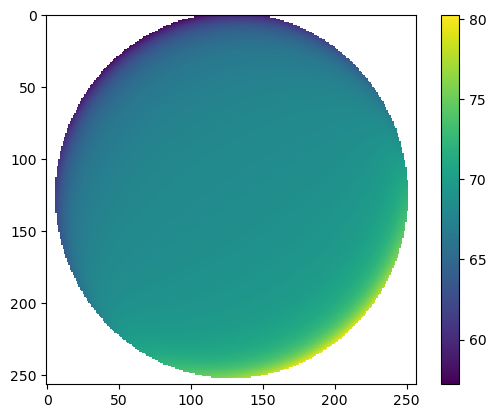

In [ ]:
print(np.shape(skymap['FULL_MAP_LATITUDE'][1]))
plt.imshow(skymap['FULL_MAP_LATITUDE'][1]) #selects the 110km skymap as shape is (1,3,data)
plt.colorbar()

In [ ]:
import asilib.asi
import asilib
from datetime import datetime 

In [ ]:
asilib_asi = asilib.asi.themis('inuv', time=datetime(2020,3,29,7,38), load_images=False, alt=110)

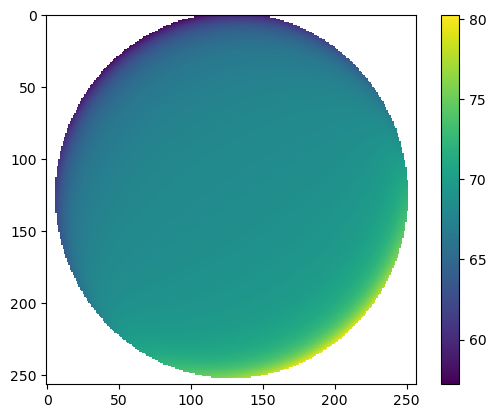

In [ ]:
plt.imshow(asilib_asi.skymap['lat'])
plt.colorbar()

c:\Users\1101w\anaconda3\envs\pymc_env\Lib\site-packages\asilib\imager.py:1854: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  p = ax.pcolormesh(


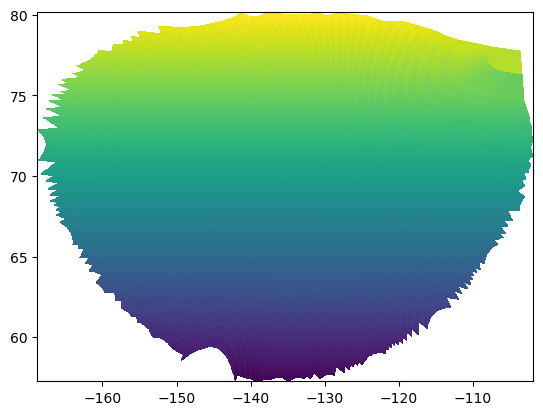

In [ ]:
fig,axes = plt.subplots()
asilib_asi._pcolormesh_nan(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'], axes)
plt.show()

C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\3460918571.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'])


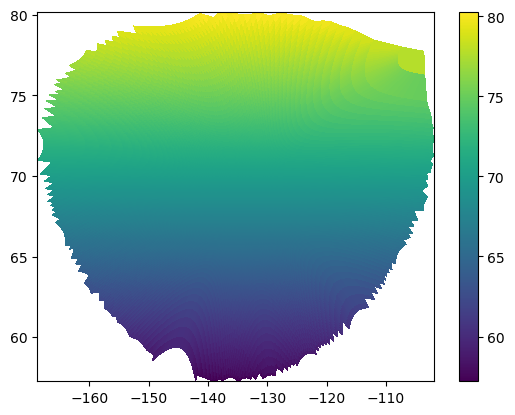

In [ ]:
plt.pcolor(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'])
plt.colorbar()

In [ ]:
print("test")

test


In [ ]:
def mask_data(data):
    """
    Returns data where the nans have been masked for plotting
    """
    return  np.ma.masked_invalid(data)

C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\1277708397.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\1277708397.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


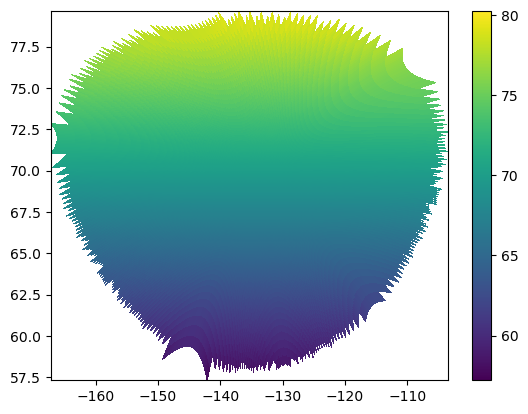

In [ ]:
plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
plt.colorbar()

C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\964550965.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(skymap['FULL_MAP_LONGITUDE'][1]-360, skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]- asilib_asi.skymap['lat'] )
C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\964550965.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


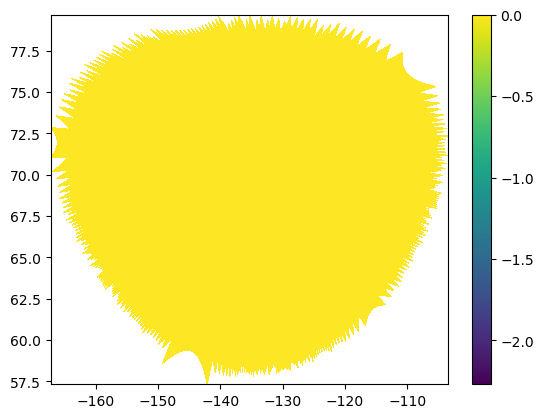

In [ ]:
plt.pcolor(skymap['FULL_MAP_LONGITUDE'][1]-360, skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]- asilib_asi.skymap['lat'] )
plt.colorbar()

Good we can reproduce asilibs result if we use the flip skymap according to IDL -> python convention

In [ ]:
skymap_url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/RGB/skymaps/yknf/yknf_20220913/rgb_skymap_yknf_20220913-%2B_v01.sav"
r = requests.get(skymap_url)

In [411]:
filename2 = "rgb_skymap_yknf_20220913-%2B_v01.sav"
with open(filename2, 'wb') as f:
    f.write(r.content)

skymap_file=scipy.io.readsav(filename2, python_dict=True)['skymap']

Exception: Invalid SIGNATURE: b'\x1f\x8b'

In [ ]:
skymap = {key: copy.copy(skymap_file[key][0]) for key in skymap_file.dtype.names}

In [ ]:
skymap

{'GENERATION_INFO': rec.array([(b'Fri May 26 14:59:46 2023', b'Megan Gillies', b'2023040510', b'+', b'20230405_UT10', b'\\\\bender.phys.ucalgary.ca\\data\\trex\\rgb\\private\\yknf_h5_to_merge\\stream0\\2023\\04\\05\\yknf_rgb-08\\ut10\\20230405_1000_yknf_rgb-08_full.h5', b'write_skymap_file.pro', array([[  0., 180.,   0.,  -1.,   0.,  -1.,   0.,   0.,   0.],
                   [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]],
                  dtype='>f8'), array([-26.        ,   4.        ,   0.99999999], dtype='>f8'), array([280. , 239.5], dtype='>f8'), array([0, 0], dtype=uint8), 1., array([   0, 5000], dtype='>i2'))                                                                                                                                               ],
           dtype=[(('date_generated', 'DATE_GENERATED'), 'O'), (('author', 'AUTHOR'), 'O'), (('valid_interval_start', 'VALID_INTERVAL_START'), 'O'), (('valid_interval_stop', 'VALID_INTERVAL_STOP'), 'O'), (('date_time_used

(3, 481, 554)


C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\3312652363.py:2: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]) #still in IDL formatting
C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\3312652363.py:3: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


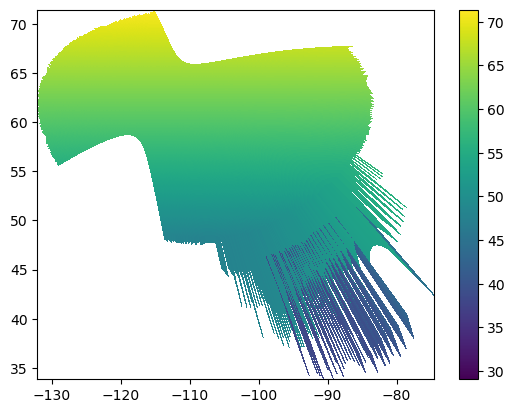

In [ ]:
print(np.shape(skymap['FULL_MAP_LONGITUDE']))
plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1]) #still in IDL formatting
plt.colorbar()

In [ ]:
for key in skymap: #Flips skymaps from IDL to python
        if hasattr(skymap[key], 'shape'):
            shape = skymap[key].shape
            if (len(shape) == 2) and (shape[0] == shape[1]):
                skymap[key] = skymap[key][::-1, :]  # For Az/El maps.
            elif (len(shape) == 3) and (shape[1] == shape[2]):
                skymap[key] = skymap[key][:, ::-1, :]  # For lat/lon maps

C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\1277708397.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\1277708397.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


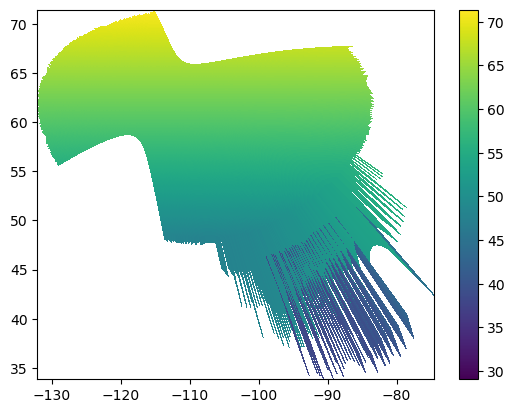

In [ ]:
plt.pcolor( skymap['FULL_MAP_LONGITUDE'][1]-360,skymap['FULL_MAP_LATITUDE'][1], skymap['FULL_MAP_LATITUDE'][1])
plt.colorbar()

C:\Users\1101w\AppData\Local\Temp\ipykernel_11228\3460918571.py:1: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'])


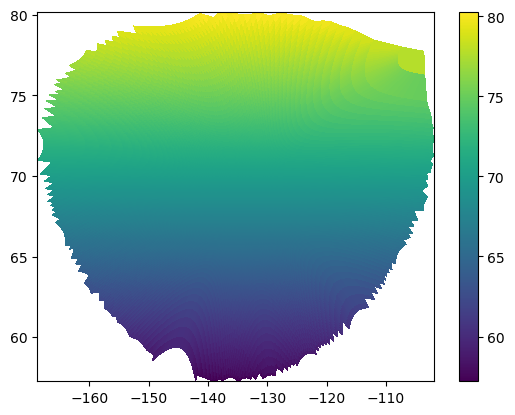

In [ ]:
plt.pcolor(asilib_asi.skymap['lon'],asilib_asi.skymap['lat'], asilib_asi.skymap['lat'])
plt.colorbar()